# Step 1: Import Libraries

In [1]:
import numpy as np  #A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices along with a collection of mathematical functions to operate on these arrays efficiently.
import pandas as pd #A popular data manipulation and analysis library. It provides data structures like DataFrame (tabular data, like spreadsheets) and Series (1D arrays), making it easy to load, analyze, and manipulate structured data.
from scipy.stats import mode #The mode function calculates the statistical mode (the most common value) of a dataset. SciPy is a library for scientific and technical computing.
import matplotlib.pyplot as plt #A widely-used plotting library for creating static, animated, and interactive data visualizations in Python. pyplot provides a MATLAB-like interface for creating plots and charts.
import seaborn as sns #A data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.preprocessing import LabelEncoder #Converts categorical labels (e.g., "male" and "female") into numeric form (e.g., 0 and 1), which is required for many machine learning algorithms.
from sklearn.model_selection import train_test_split #Splits arrays or matrices into random train and test subsets, which is useful for model validation.
from sklearn.model_selection import cross_val_score # It performs cross-validation (multiple train-test splits) to evaluate a model’s performance more robustly.
from sklearn.svm import SVC #An implementation of Support Vector Machines for classification, a supervised machine learning algorithm effective for high-dimensional data.
from sklearn.naive_bayes import GaussianNB # An implementation of the Gaussian Naive Bayes algorithm, a simple and fast probabilistic classifier based on Bayes’ theorem, assuming features follow a normal distribution.
from sklearn.ensemble import RandomForestClassifier #An ensemble learning method that builds multiple decision trees and merges their results to improve classification accuracy and control over-fitting.
from sklearn.metrics import accuracy_score #Calculates the accuracy of a classification model, i.e., the ratio of correctly predicted samples to the total samples.
from sklearn.metrics import confusion_matrix #It generates a confusion matrix to evaluate the performance of a classification algorithm. It shows the counts of actual vs. predicted classes.

# Step 2: Reading the dataset

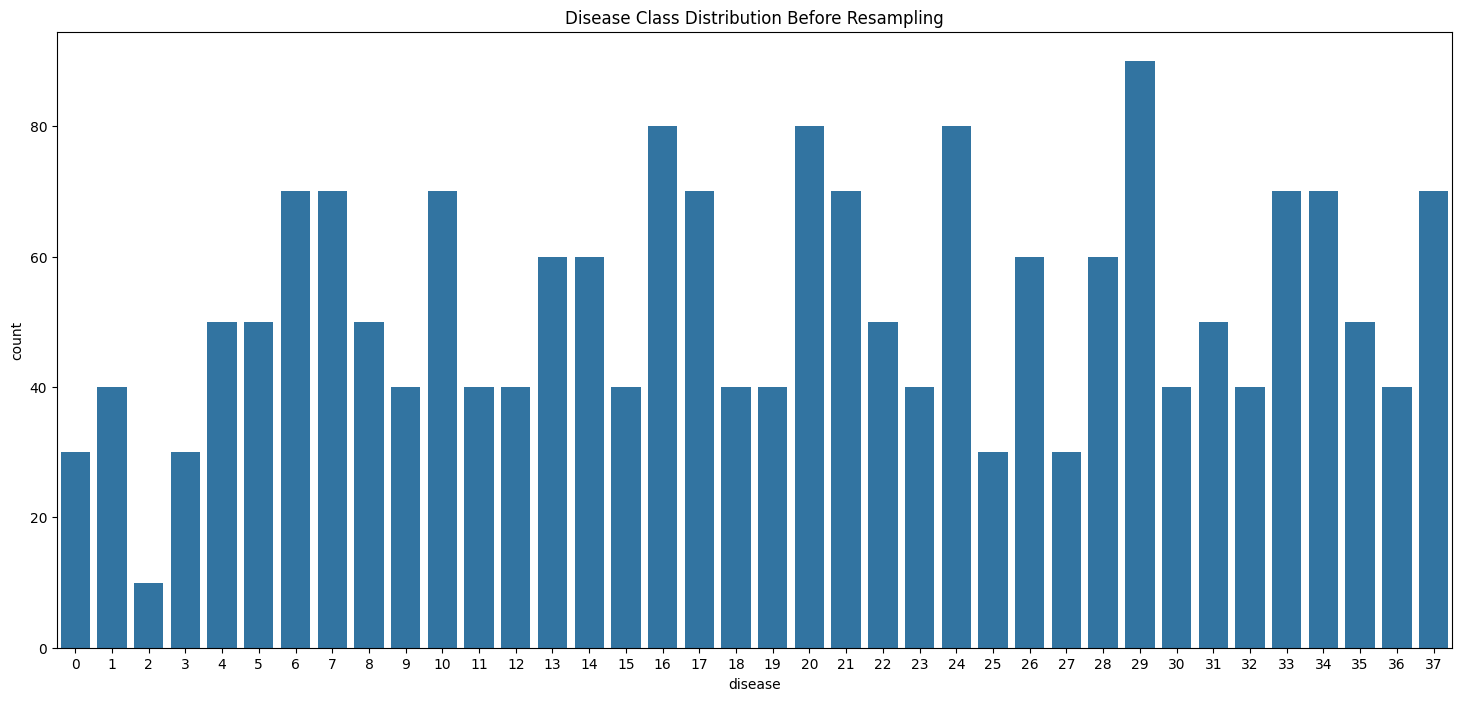

Resampled Class Distribution:
 disease
29    90
11    90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
9     90
20    90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
5     90
22    90
35    90
31    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
2     90
Name: count, dtype: int64


In [2]:
from imblearn.over_sampling import RandomOverSampler #This tool helps balance datasets by randomly duplicating samples from minority classes, so that every class has the same number of samples (helpful for training machine learning models on imbalanced data).

data = pd.read_csv('improved_disease_dataset.csv') #Reads the CSV file into a DataFrame: Loads the dataset named 'improved_disease_dataset.csv' into a pandas DataFrame called data for analysis and manipulation.

encoder = LabelEncoder() #Encodes the 'disease' column as numbers:LabelEncoder() turns categorical text labels (like disease names) into numbers (e.g., “Flu” → 0, “Cold” → 1, etc.).

data["disease"] = encoder.fit_transform(data["disease"]) #The transformation is fit to the unique diseases and replaces the original column.

#Splits the dataset into features and target:

X = data.iloc[:, :-1] # All columns except the last one (which is assumed to be the target, here 'disease').

y = data.iloc[:, -1] # The last column, which is the encoded disease label.

plt.figure(figsize=(18, 8)) #Makes a large figure (18x8 inches)
sns.countplot(x=y) #Uses Seaborn to plot how many samples there are of each disease class.
plt.title("Disease Class Distribution Before Resampling") 
plt.show()

ros = RandomOverSampler(random_state=42) #Instantiates a RandomOverSampler with a fixed random seed for reproducibility.
X_resampled, y_resampled = ros.fit_resample(X, y) #fit_resample(X, y) duplicates samples from minority classes until all classes have the same number of samples, returning the balanced feature set (X_resampled) and balanced labels (y_resampled).

print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts()) #Converts y_resampled to a pandas Series and prints out the count of each class label, showing that all classes now have the same number of samples.

# Step 3: Cross-Validation with Stratified K-Fold

In [3]:
from sklearn.tree import DecisionTreeClassifier # A machine learning model that uses a tree-like structure for classification.
from sklearn.model_selection import StratifiedKFold # : A cross-validation splitter that ensures each fold of the dataset has the same proportion of classes as the whole dataset.


if 'gender' in X_resampled.columns: #Checks if the feature gender exists in the resampled data. If yes, uses LabelEncoder to convert categorical gender values (like 'male', 'female') into numeric values (like 0, 1).
    le = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])

X_resampled = X_resampled.fillna(0) #Replaces all missing (NaN) values in the features with 0. This prevents errors during model training (as most models cannot handle NaNs).

if len(y_resampled.shape) > 1: #Checks if target labels (y_resampled) have more than one dimension. If so, flattens them to a 1D array. Most classifiers expect the target to be 1D, not a column or matrix.
    y_resampled = y_resampled.values.ravel()

models = {                                            #Creates a dictionary with two models: This structure makes it easy to loop through and evaluate multiple models.

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

cv_scoring = 'accuracy'   #Sets scoring metric to 'accuracy' (proportion of correct predictions).
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Sets up 5-fold stratified cross-validation:Data is split into 5 parts ("folds").Each fold preserves the overall class distribution (important for imbalanced datasets).shuffle=True randomly shuffles data before splitting.random_state=42 ensures reproducibility.

for model_name, model in models.items(): #For each model in the dictionary:Runs cross-validation using cross_val_score:The model is trained and tested 5 times (once on each fold).Prints a separator line.Prints the model name, the accuracy scores for each fold, and the average accuracy.If an error occurs (e.g., due to bad data), prints an error message for that model.


    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,            #.uses all CPU cores for speed.
            error_score='raise'   # makes sure errors are not silently ignored
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Model: Decision Tree
Scores: [0.5497076  0.54385965 0.5380117  0.53654971 0.52923977]
Mean Accuracy: 0.5395
Model: Random Forest
Scores: [0.56578947 0.54093567 0.54532164 0.52777778 0.51315789]
Mean Accuracy: 0.5386
Model: SVM
Scores: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
Mean Accuracy: 0.5000


# Step 4: Training Individual Models and Generating Confusion Matrices

## Support Vector Classifier (SVC)

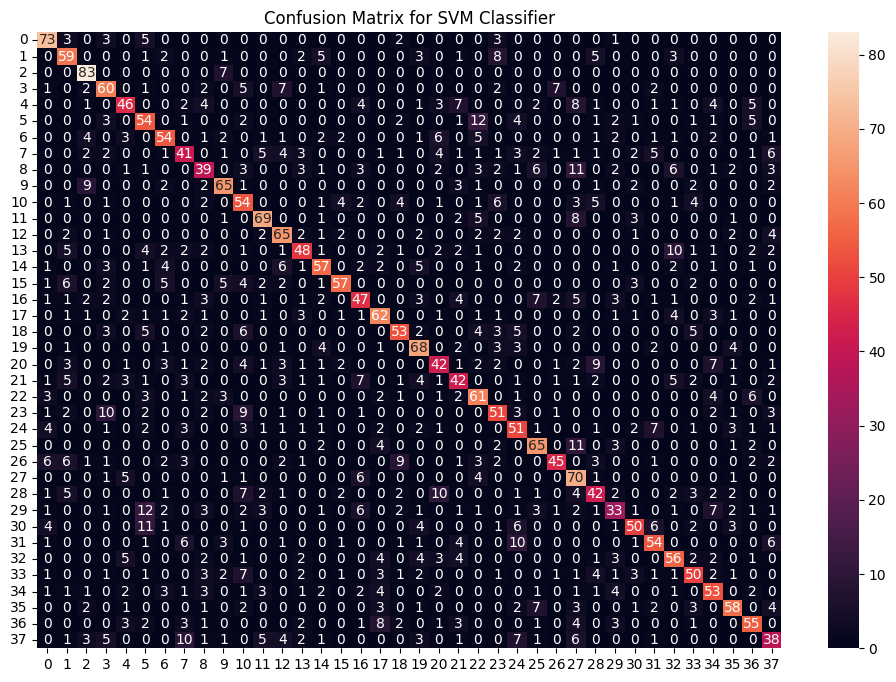

SVM Accuracy: 60.53%


In [4]:
svm_model = SVC() #SVC() creates a Support Vector Machine classifier using default settings. svm_model is now an object you can train and use for predictions.
svm_model.fit(X_resampled, y_resampled) #.fit() takes the balanced/resampled features (X_resampled) and their corresponding labels (y_resampled) and trains the SVM model on this data.
svm_preds = svm_model.predict(X_resampled) #.predict() uses the trained model to predict the labels of the same data it was trained on (X_resampled).svm_preds is an array of predicted class labels.


cf_matrix_svm = confusion_matrix(y_resampled, svm_preds) #confusion_matrix() compares the true labels (y_resampled) to the predicted labels (svm_preds).The confusion matrix shows how many samples were correctly or incorrectly classified for each class.
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

print(f"SVM Accuracy: {accuracy_score(y_resampled, svm_preds) * 100:.2f}%")

## Gaussian Naive Bayes

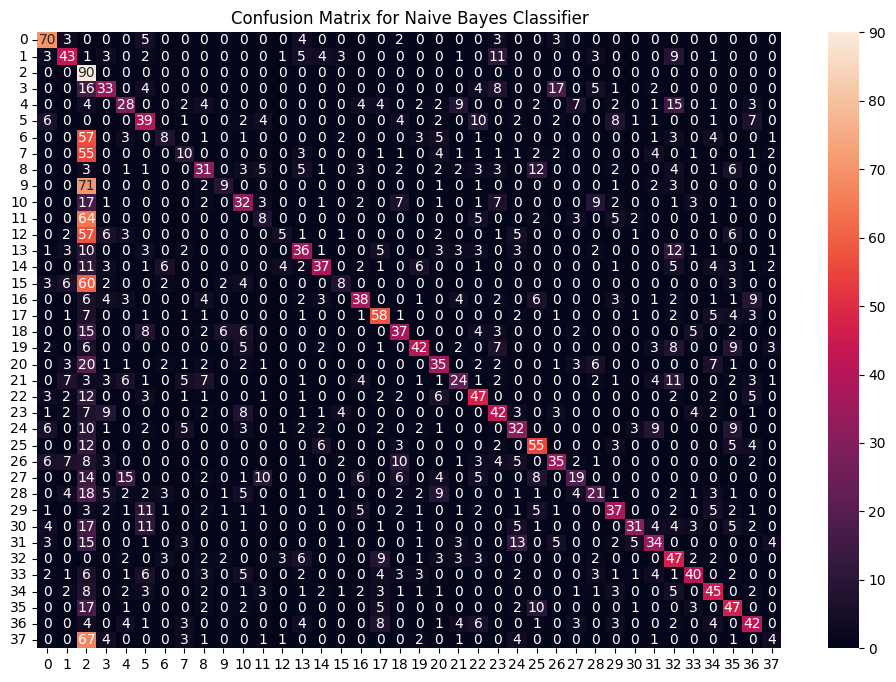

Naive Bayes Accuracy: 37.98%


In [5]:
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_nb, annot=True, fmt="d")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

print(f"Naive Bayes Accuracy: {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")

## Random Forest Classifier

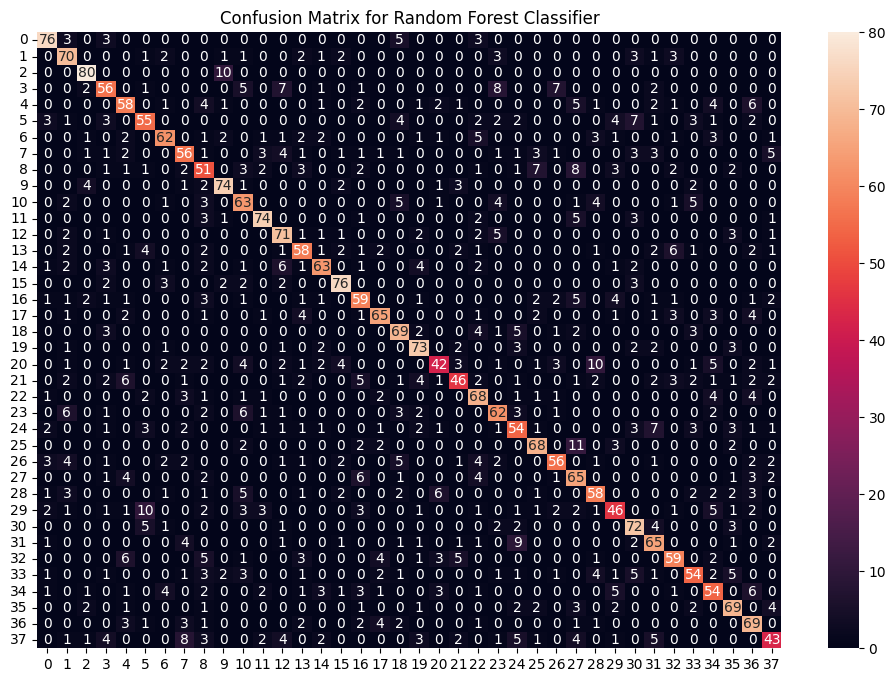

Random Forest Accuracy: 68.98%


In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_resampled)

cf_matrix_rf = confusion_matrix(y_resampled, rf_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_rf, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

print(f"Random Forest Accuracy: {accuracy_score(y_resampled, rf_preds) * 100:.2f}%")

# Step 5: Combining Predictions for Robustness

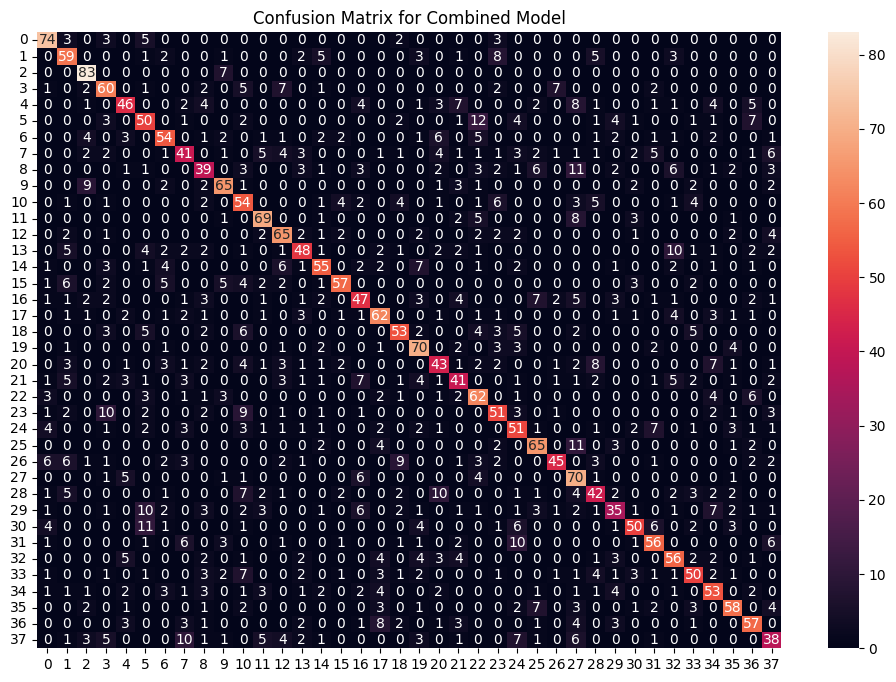

Combined Model Accuracy: 60.64%


In [7]:
from statistics import mode #mode returns the most common value (the statistical mode) in a list or sequence. Here, it's used for majority voting (ensemble prediction).

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)] #zip(svm_preds, nb_preds, rf_preds) takes the predictions from SVM, Naive Bayes, and Random Forest, and groups them per sample (i.e., for each data point, you get a tuple with 3 predictions).The list comprehension iterates over these tuples.For each tuple (i, j, k), mode([i, j, k]) calculates the most common prediction among the three classifiers.The result is final_preds, a list of the majority-voted predictions for every sample.

cf_matrix_combined = confusion_matrix(y_resampled, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_combined, annot=True, fmt="d")
plt.title("Confusion Matrix for Combined Model")
plt.show()

print(f"Combined Model Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")

# Step 6: Creating Prediction Function

In [8]:
symptoms = X.columns.values #X.columns.values extracts all the column (feature) names from your feature DataFrame X—these are assumed to be symptoms.
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)} #Builds a dictionary mapping each symptom’s name to its column index. This helps quickly convert a list of symptom names into the correct feature vector positions.

def predict_disease(input_symptoms): #This function takes a string of comma-separated symptom names as input and predicts the disease using three models.
    input_symptoms = input_symptoms.split(",") #Converts the comma-separated symptom string (e.g., "Itching,Skin Rash") into a list: ["Itching", "Skin Rash"].
    input_data = [0] * len(symptom_index) #Creates a list of zeros, one for each symptom (feature). This will be your feature vector, indicating which symptoms are present (1) or absent (0).
    
    for symptom in input_symptoms: #For every symptom in the user’s list, sets the relevant position in input_data to 1 (present). If the symptom isn’t part of the known symptoms, it’s skipped.
        if symptom in symptom_index: 
            input_data[symptom_index[symptom]] = 1
    
    input_data = np.array(input_data).reshape(1, -1) #Turns the list into a NumPy array and reshapes it into a row vector (2D array with 1 row), which is required for model prediction in scikit-learn.

    rf_pred = encoder.classes_[rf_model.predict(input_data)[0]] #Uses the trained models to make predictions: predict() returns an encoded label.encoder.classes_[] converts the encoded label back to the original disease name.
    nb_pred = encoder.classes_[nb_model.predict(input_data)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_data)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred]) #Finds the majority vote (mode):
    
    return {                                      #Returns a dictionary with predictions from all three models and the final prediction.
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction": final_pred
    }

print(predict_disease("Itching,Skin Rash,Nodal Skin Eruptions")) 

{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Urinary tract infection', 'SVM Prediction': 'Impetigo', 'Final Prediction': 'Heart attack'}


C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
